# Main evolution 
Check Input.py file to set box size and other parameters 

In [126]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from numpy import random
from numba import jit,njit,prange
from scipy import fftpack
from scipy.fft import fft, ifft, fft2,fftshift
from random import randrange
import sys

sys.path.insert(0, '/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Scripts/') 
sys.path.insert(0, '/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/') 
#sys.path.insert(0, '/home/z5278074/PQaxions/Scripts/') # ON KATANA

from Input import *

from Spatial import Laplacian_2D, Laplacian_3D, Gradient_2D
from StringID import cores_pi,cores_std,histo_std
from Plot import TwilightPlot,Snap_Save,FourierPlot,RdBuPlot,BinaryPlot,cbar
from Init import init_noise, kernels


mov_dir2D = '/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Output/Snapshots/2D/'
mov_dir3D = '/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Output/Snapshots/3D/'
#mov_dir2D = '/home/z5278074/PQaxions/Output/Snapshots/2D/' # ON KATANA
#mov_dir3D = '/home/z5278074/PQaxions/Output/Snapshots/3D/' # ON KATANA

############################################################################
# OPEN OUTPUT FILES - uncomment to use
############################################################################


#scaling2D = open("/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Output/Data/scaling2D.txt","w+")
#scaling3D = open("/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Output/Data/scaling3D.txt","w+")
#energy = open("/Users/z5278074/OneDrive - UNSW/AxionSimulations/PQsim/Output/Data/energy.txt","w+")
#----------------------------------------------------------------------------

phi1,phi2,phidot1,phidot2 = init_noise(N)
K1,K2 = kernels(phi1,phi2,phidot1,phidot2)

final_step = light_time-int(1/DeltaRatio)+1

# FOR 3D PLOTTING 
z_slice = randrange(N-1)

for tstep in range(0,light_time-int(1/DeltaRatio)+1):
    
    #----------------------------------------------------------------------------
    # KDK EVOLUTION
    #----------------------------------------------------------------------------
    
    phi1 = phi1 + dtau*(phidot1 + 0.5*K1*dtau)
    phi2 = phi2 + dtau*(phidot2 + 0.5*K2*dtau)
    t_evol = t_evol + dtau
    K1_next, K2_next = kernels(phi1,phi2,phidot1,phidot2)
    if NDIMS == 2:
        K1_next = Laplacian_2D(phi1,dx,N) - 2*(Era/t_evol)*phidot1 - lambdaPRS*phi1*(phi1**2.0+phi2**2.0 - 1)
        K2_next = Laplacian_2D(phi2,dx,N) - 2*(Era/t_evol)*phidot2 - lambdaPRS*phi2*(phi1**2.0+phi2**2.0 - 1)
    if NDIMS == 3:
        K1_next = Laplacian_3D(phi1,dx,N) - 2*(Era/t_evol)*phidot1 - lambdaPRS*phi1*(phi1**2.0+phi2**2.0 - 1)
        K2_next = Laplacian_3D(phi2,dx,N) - 2*(Era/t_evol)*phidot2 - lambdaPRS*phi2*(phi1**2.0+phi2**2.0 - 1)
    phidot1 = phidot1 + 0.5*(K1 + K1_next)*dtau
    phidot2 = phidot2 + 0.5*(K2 + K2_next)*dtau
    K1 = 1.0*K1_next
    K2 = 1.0*K2_next
    
    #----------------------------------------------------------------------------
    # TEMPORAL QUANTITIES
    #----------------------------------------------------------------------------
    
    kappa = log(t_evol/ms) # String tension (also time variable)
    R = t_evol/(ms*L) # Scale factor in L units
    time = t0*(R/R0*ms)**2.0 # Cosmic time in L units 
    
    #----------------------------------------------------------------------------
    # FIELDS 
    #----------------------------------------------------------------------------
    
    PHI = phi1 + 1j * phi2
    PHIDOT = phidot1 +1j * phidot2
    saxion = sqrt(phi1**2.0+phi2**2.0) # Or abs(PHI)
    axion = arctan2(phi1,phi2)
    
    #----------------------------------------------------------------------------
    # STRINGS AND SCALING - uncomment to use
    #----------------------------------------------------------------------------
    
#     Nchecks = 40
#     to_analyse = arange(0, final_step,int(final_step/Nchecks))
#     thr = 1 # In % value
#     if i in to_find:
#         num_cores = cores_pi(axion,N,thr) # Call cores_pi2 to use pi/2 method
#         thetasum = cores_std(axion,N,thr) # Array of values of DeltaTheta over the loop (useful for the histogram)
#         histo, ax_histo = histo_std(thetasum, log(t_evol),num_cores) # Histogram plot 
#         xi_2D = num_cores*time**2.0/(t_evol**2.0) # Scaling parameter
#         scaling2D.write('%f %f \n' % (kappa,xi_2D))
#         print(kappa,xi_3D) # if output is for array job 
#         
#         num_plaqs = plaq_pi(axion,N,thr)
#         xi_3D = num_plaqs*time**2.0/(t_evol**3.0)
#         scaling3D.write('%f %f \n' % (kappa,xi_3D))
#         print(kappa,xi_3D) # if output is for array job 
        
    #----------------------------------------------------------------------------
    # ENERGIES - uncomment to use
    #----------------------------------------------------------------------------
    
#    saxiondot = PHIDOT 
#    axiondot = (PHIDOT/PHI).imag
#    axiondot_screen = saxion*axiondot
#    saxiongrad = Gradient_2D(saxion,dx,N)
#    axiongrad = Gradient_2D(axion,dx,N)
#    saxkin = 0.5*saxiondot**2.0
#    axkin = 0.5*axiondot**2.0
#    pot = lambdaPRS*(saxion**2.0-fa)**2.0 # Saxion potential energy

    #----------------------------------------------------------------------------
    # SNAPSHOTS - uncomment to use
    #----------------------------------------------------------------------------

    # 2D
#     to_print = arange(0, final_step,int(final_step/30))
#     if tstep in to_print:
#         fig,ax = FourierPlot(axion,N,L,tstep,11,10)
#         Snap_Save(fig,tstep,mov_dir2D)
#         fig_axion,ax_axion = TwilightPlot(axion,t_evol)
#         fig_saxion,ax_saxion = RdBuPlot(saxion,t_evol)
#         Snap_Save(fig_axion,tstep,mov_dir2D)
#         Snap_Save(fig_saxion,tstep,mov_dir2D)
    # 3D
#    fig_axion_projected,ax_axion_projected = TwilightPlot(axion[0:,0:,z_slice],t_evol)
#    Snap_Save(fig_axion_projected,tstep,mov_dir3D)

    
############################################################################
# CLOSE OUTPUT FILES - uncomment to use
############################################################################

#scaling2D.close()
#scaling3D.close()
#energy.close()

## Plots of axion velocity field 
With screening we remove kinetic energy coming from the strings

In [99]:
# COMPARE VELOCITY AND SCREENED VELOCITY 
# from PlotFuncs import MySquarePlot,cbar
#fig1,ax1 = RdBuPlot(axiondot,tstep)
#fig2,ax2 = RdBuPlot(axiondot_screen,tstep)

In [98]:
#fig1,ax1 = FourierPlot(axion[:,:,z_slice],N,L,tstep,11,10)
#fig3,ax3 = FourierPlot(axiondot,N,L,tstep,4,3)
#fig4,ax4 = FourierPlot(axiondot_screen,N,L,tstep,4,3)

## For 3D simulations
Plot 2D slices from random selection or through an entire axis 

In [100]:
#print("Random slice selected: z =",z_slice)
#fig_axion_projected,ax_axion_projected = TwilightPlot(axion[0:,0:,z_slice],t_evol)
#
# SCAN THE Z-DIRECTION
# for i in range(N-1):
#     fig_i, ax_i = TwilightPlot(axion[0:,0:,i],t_evol)
#     Snap_Save(fig_i,i,mov_dir2D)

# Power spectrum of relativistic axions
Comparison between screening (blue) and no screening (red)

***TO CHECK UNITS***

In [210]:
y1 = fftshift(fft2(axiondot))
y2 = fftshift(fft2(axiondot_screen))
dk = 2*pi/L
kx = linspace(-pi+dk,pi,N-1)
KX,KY = meshgrid(kx,kx)
K = sqrt(KX**2+KY**2)
P1 = abs(y1[1:,1:])**2
P2 = abs(y2[1:,1:])**2
#print(5/t_evol) # k=5H

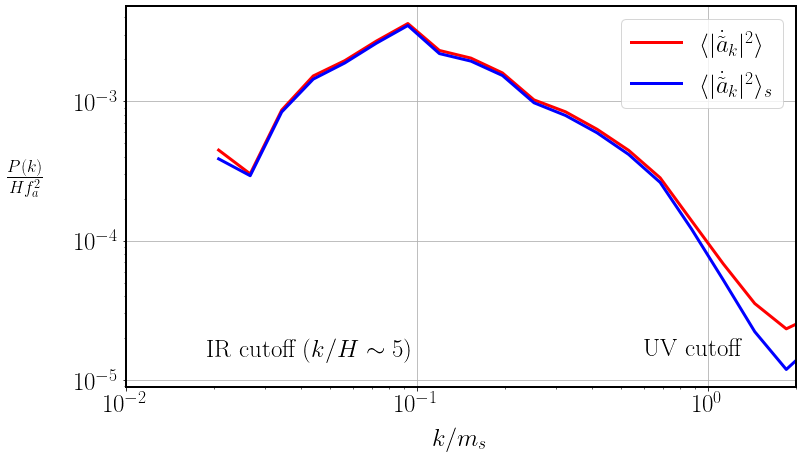

In [207]:
from PlotFuncs import MySquarePlot
#fig1,ax1 = MySquarePlot()
#fig2,ax2 = MySquarePlot()
# Plot 1D power spectrum
plt.figure(figsize=(12,7))
from scipy import stats
H1,k_bins1,ik1 = stats.binned_statistic(log(K.flatten()),P1.flatten(),bins=25)
H2,k_bins2,ik2 = stats.binned_statistic(log(K.flatten()),P2.flatten(),bins=25)
#H /= sum(H)
k_bin_centers1 = (k_bins1[1:]+k_bins1[0:-1])/2
k_bin_centers2 = (k_bins2[1:]+k_bins2[0:-1])/2
plt.grid()
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)
plt.loglog(exp(k_bin_centers1),H1/(L**2.0*t_evol),lw=3,c='r') 
plt.loglog(exp(k_bin_centers2),H2/(L**2.0*t_evol),lw=3,c='b')
plt.xlim(0.01, 2)
plt.text(0.6,0.000015,"UV cutoff")
plt.text(0.019,0.000015,r"IR cutoff ($k/H\sim 5$)")
plt.xlabel(r'$k/m_s$',labelpad=10)
plt.ylabel(r'$\frac{P(k)}{Hf_a^2}$',rotation=0,labelpad=50)
plt.gca().legend((r'$\langle\vert\dot{\tilde{a}}_k\vert^2\rangle$',r'$\langle\vert\dot{\tilde{a}}_k\vert^2\rangle_s$'))
plt.show()